In [2]:
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('bol_sales.csv')
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


In [4]:
df_subset = df[['website_visits', 'pages_viewed', 'income', 'spent_bol']]
df_subset.head()

,website_visits,pages_viewed,income,spent_bol
0,30,105,7065,1232
1,23,81,23028,1396
2,11,38,103377,1240
3,16,54,9815,720
4,21,78,22646,1379


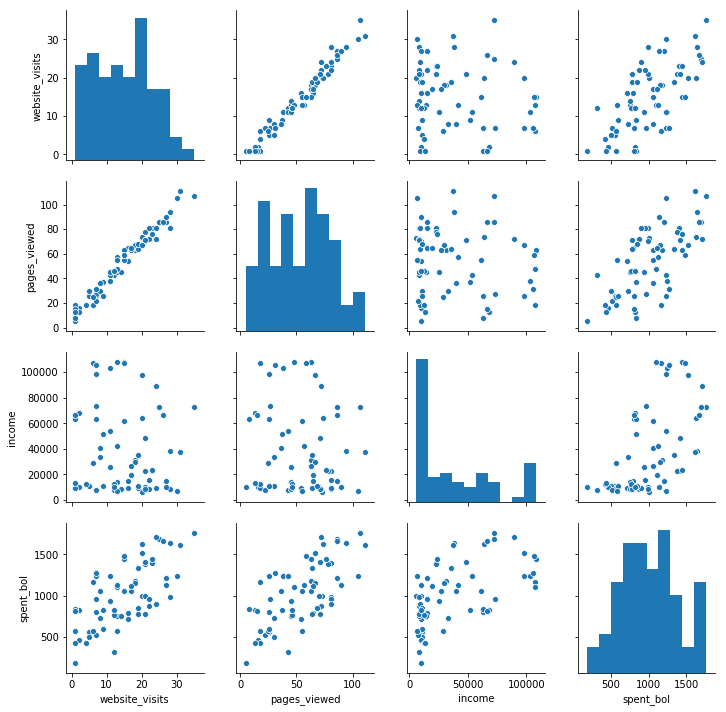

In [5]:
sns.pairplot(df_subset)
plt.show()

In [6]:
x = df_subset[['income','website_visits', 'pages_viewed']] 
y = df_subset['spent_bol'] 
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

df_subset['spent_bol_p'] = lm.predict(x) #use built-in predict() method to generate predictions and store in original dataframe
df_subset.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,website_visits,pages_viewed,income,spent_bol,spent_bol_p
0,30,105,7065,1232,1330.384991
1,23,81,23028,1396,1192.975679
2,11,38,103377,1240,1323.524102
3,16,54,9815,720,812.239876
4,21,78,22646,1379,1157.774353
5,20,73,6142,1000,985.218110
6,20,74,63833,1625,1415.198961
7,21,70,10139,991,983.823229
8,28,81,8452,990,1090.219644
9,22,81,15367,954,1136.602275


In [7]:
y = df_subset['spent_bol'] #We need to take out the spent_bol colum as our Y-variable
X = df_subset[['website_visits', 'pages_viewed', 'income']] 
X.head() # 3 indepents (X) and 1 dependent (Y) = spent_bol

,website_visits,pages_viewed,income
0,30,105,7065
1,23,81,23028
2,11,38,103377
3,16,54,9815
4,21,78,22646


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The training data

,website_visits,pages_viewed,income
10,28,94,38084
59,11,45,25821
19,18,63,31230
34,8,30,33405
63,13,55,7090


In [151]:
# Creating a lineair model variable
lm = LinearRegression()
model = lm.fit(X_train, y_train) # Training the model, based on the training set

In [149]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-7.731914,website_visits
13.139546,pages_viewed
0.007556,income


In [150]:
# Calcularing the RMSE
math.sqrt(mean_squared_error(y_test, y_p))

142.19417341462363

The RMSE of the training data set is 142 thousand euro. Which means that we are typically about 117 thousend euro off in our prediction.

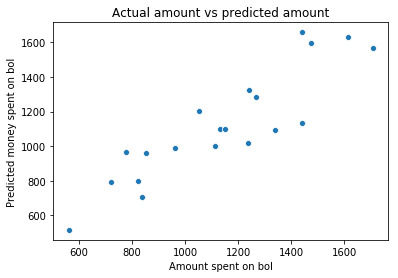

In [131]:
sns.scatterplot(y_test, y_p)
plt.title('Actual amount vs predicted amount')
plt.xlabel('Amount spent on bol')
plt.ylabel('Predicted money spent on bol')
plt.show() 

In [18]:
# Reading holdout file and making a dataframe out of it
df_holdout = pd.read_csv('bol_sales_holdout.csv') # Creating a variable for the new data set 
df_holdout.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media
0,person_67,male,10813,4.8,10,41,107
1,person_68,male,56724,13.2,12,52,0
2,person_69,male,11476,9.0,2,16,120
3,person_70,male,37781,11.4,15,56,134
4,person_71,male,26179,9.4,14,50,92


In [23]:
# Creating a variable for the x variables used in the previous model
X_holdout = df_holdout[['income','website_visits', 'pages_viewed']]
X_holdout.head()

,income,website_visits,pages_viewed
0,10813,10,41
1,56724,12,52
2,11476,2,16
3,37781,15,56
4,26179,14,50


In [24]:
# Predicting the amount of spent on bold based on the holdout data set
df_holdout['spent_bol_p'] = lm.predict(X_holdout)
df_holdout.head(10)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol_p
0,person_67,male,10813,4.8,10,41,107,680.738457
1,person_68,male,56724,13.2,12,52,0,1130.072118
2,person_69,male,11476,9.0,2,16,120,421.021584
3,person_70,male,37781,11.4,15,56,134,1035.740583
4,person_71,male,26179,9.4,14,50,92,888.465511
5,person_72,female,96452,2.9,17,52,87,1422.289146
6,person_73,female,9952,3.2,3,20,118,452.080634
7,person_74,female,7857,6.0,11,37,109,618.398952
8,person_75,male,11600,4.2,14,49,69,772.054170
9,person_76,female,46561,7.0,15,56,64,1099.600768


In [25]:
# Checking data file with actual answers to compare with holdout data set
df_answers = pd.read_csv('bol_sales_holdout_answers.csv') # Creating a variable for the new data set 
df_answers.head(10)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_67,male,10813,4.8,10,41,107,470
1,person_68,male,56724,13.2,12,52,0,1219
2,person_69,male,11476,9.0,2,16,120,360
3,person_70,male,37781,11.4,15,56,134,1091
4,person_71,male,26179,9.4,14,50,92,879
5,person_72,female,96452,2.9,17,52,87,1157
6,person_73,female,9952,3.2,3,20,118,400
7,person_74,female,7857,6.0,11,37,109,573
8,person_75,male,11600,4.2,14,49,69,538
9,person_76,female,46561,7.0,15,56,64,1206


In [27]:
# Calculating the MRSE of data set and compare it to the previous one
math.sqrt(mean_squared_error(df_holdout['spent_bol_p'], df_answers['spent_bol']))

158.0175427209862

The RMSE of the holdout data set is 158 thousand euro. Which means that we are typically about 158 thousend euro off in our prediction.